In [1]:
import requests
import json
import pandas as pd

In [2]:
! pip install folium
import folium
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt
import chart_studio as plotly
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import random

In [3]:
print("COVID19 Analysis")
url_1 = 'https://api.covid19api.com/summary'
response_summary = requests.get(url_1)
summary = response_summary.json()


COVID19 Analysis


In [4]:
New_Confirmed = summary['Global']['NewConfirmed']
Total_Confirmed = summary['Global']['TotalConfirmed']
New_Deaths = summary['Global']['NewDeaths']
Total_Deaths = summary['Global']['TotalDeaths']
New_Recovered = summary['Global']['NewRecovered']
Total_Recovered = summary['Global']['TotalRecovered']
print("New COVID19 Reports")
Overall_df = pd.DataFrame({'NewConfirmed': [New_Confirmed],'TotalConfirmed': [Total_Confirmed],'NewDeaths': [New_Deaths],'TotalDeaths': [Total_Deaths],'NewRecovered': [New_Recovered],'TotalRecovered': [Total_Recovered]})
Overall_df

New COVID19 Reports


,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
0,151812,3503238,8547,247349,87183,1125094


In [5]:
def GetCountries():
    response = requests.get('https://api.covid19api.com/summary')
    data_dict = response.json()
    countries = data_dict['Countries']
    return countries
countries = GetCountries()
country_df = pd.DataFrame(countries)
country_df

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,ALA Aland Islands,AX,ala-aland-islands,0,0,0,0,0,0,2020-05-04T21:49:42Z
1,Afghanistan,AF,afghanistan,0,2704,0,85,0,345,2020-05-04T21:49:42Z
2,Albania,AL,albania,0,795,0,31,0,531,2020-05-04T21:49:42Z
3,Algeria,DZ,algeria,0,4474,0,463,0,1936,2020-05-04T21:49:42Z
4,American Samoa,AS,american-samoa,0,0,0,0,0,0,2020-05-04T21:49:42Z
...,...,...,...,...,...,...,...,...,...,...
243,Wallis and Futuna Islands,WF,wallis-and-futuna-islands,0,0,0,0,0,0,2020-05-04T21:49:42Z
244,Western Sahara,EH,western-sahara,0,6,0,0,0,5,2020-05-04T21:49:42Z
245,Yemen,YE,yemen,0,10,0,2,0,1,2020-05-04T21:49:42Z
246,Zambia,ZM,zambia,0,124,0,3,0,78,2020-05-04T21:49:42Z


{'TotalConfirmed', 'TotalDeaths', 'NewConfirmed', 'NewRecovered', 'NewDeaths', 'TotalRecovered'}
Enter or copy one of the case types listed here: TotalConfirmed
Enter the same case type again to view bar chart of top10 countries: TotalConfirmed


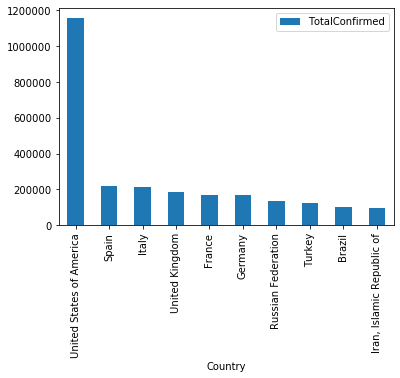

In [6]:
case_type = {'TotalConfirmed', 'NewConfirmed', 'NewDeaths', 'TotalDeaths', 'NewRecovered', 'TotalRecovered'}
print(case_type)
you_want = input('Enter or copy one of the case types listed here: ')
try:
    top = country_df.sort_values(input('Enter the same case type again to view bar chart of top10 countries: '), ascending = False)
    top.head(10).plot.bar(y = {you_want} ,x = 'Country')
except KeyError:
    print('You entered wrong case type!')

In [7]:
print("COVID19 in America")
url = 'https://api.covid19api.com/live/country/united%20states%20of%20america/status/confirmed'
def US():
    response = requests.get('https://api.covid19api.com/live/country/united%20states%20of%20america/status/confirmed')
    data_dict = response.json()
    return data_dict
data_dict1 = US()
us_df = pd.DataFrame(data_dict1)


COVID19 in America


In [8]:
print("Total Confirmed Cases Map in America")
CENTER_US = (39.8333333,-98.585522)
london = (51.5074, -0.1278)
map = folium.Map(location=CENTER_US, zoom_start=4)
for row in us_df.to_records():
    pos = (row['Lat'],row['Lon'])
    marker = folium.CircleMarker(location=pos, radius=row['Confirmed']/8000, color='purple',fill=True,fill_color='red',
                    popup="%s,%s" % (row['Province'],row['Confirmed'])
                          )
    map.add_child(marker)
map

Total Confirmed Cases Map in America


In [9]:
print("Active Cases Map in America")
CENTER_US = (39.8333333,-98.585522)
london = (51.5074, -0.1278)
map = folium.Map(location=CENTER_US, zoom_start=4)
for row in us_df.to_records():
    pos = (row['Lat'],row['Lon'])
    marker = folium.CircleMarker(location=pos, radius=row['Active']/8000, color='orange', fill=True,fill_color='purple',
                    popup="%s,%s" % (row['Province'],row['Active'])
                          )
    map.add_child(marker)
map

Active Cases Map in America
